In [1]:
##### Read cleaned combined data 
# Dependencies

import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

from random import seed
from random import randint

# Time calculations
import time
import datetime
# from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os,csv

In [2]:
# Set up output path 
Output_Data_Path_Folder = "../Output" 
Reddit_Data_Input_Path = "../Data/Clean Data_with new comments-EOClean.csv"

In [3]:
# read in the csv created in the WeatherPy section
combined_data_df = pd.read_csv(Reddit_Data_Input_Path,dtype="object", encoding="latin")

In [4]:
# Check data
print(combined_data_df.count())
print(combined_data_df.dtypes)

Date                      1463
Time                      1463
open                      1463
high                      1463
low                       1463
close                     1463
volume                    1463
# of Comments (Hourly)    1462
time                      1463
dtype: int64
Date                      object
Time                      object
open                      object
high                      object
low                       object
close                     object
volume                    object
# of Comments (Hourly)    object
time                      object
dtype: object


In [5]:
# Fix data types and create Date_Object for plotting
combined_data_df[['open','high','low','close','volume','# of Comments (Hourly)']] = combined_data_df[['open','high','low','close','volume','# of Comments (Hourly)']].astype(float)
combined_data_df["Date_Object"] = pd.to_datetime(combined_data_df["Date"])

In [6]:
# Check data again
print(combined_data_df.dtypes)
combined_data_df

Date                              object
Time                              object
open                             float64
high                             float64
low                              float64
close                            float64
volume                           float64
# of Comments (Hourly)           float64
time                              object
Date_Object               datetime64[ns]
dtype: object


,Date,Time,open,high,low,close,volume,# of Comments (Hourly),time,Date_Object
0,2/2/2021,20:00,90.0000,90.5000,85.00,85.20,288108.0,459.0,2/2/2021 20:00,2021-02-02
1,2/2/2021,19:00,92.0000,94.0000,88.00,90.00,232127.0,483.0,2/2/2021 19:00,2021-02-02
2,2/2/2021,18:00,88.8200,96.0000,86.01,92.00,476352.0,500.0,2/2/2021 18:00,2021-02-02
3,2/2/2021,17:00,90.7600,93.8900,85.33,88.78,843580.0,500.0,2/2/2021 17:00,2021-02-02
4,2/2/2021,16:00,99.8561,101.9599,88.00,90.47,5582379.0,500.0,2/2/2021 16:00,2021-02-02
...,...,...,...,...,...,...,...,...,...,...
1458,9/14/2020,09:00,6.8755,6.9800,6.52,6.80,181079.0,0.0,9/14/2020 09:00,2020-09-14
1459,9/14/2020,08:00,6.6500,6.9800,6.52,6.84,106580.0,0.0,9/14/2020 08:00,2020-09-14
1460,9/14/2020,07:00,6.5400,6.5400,6.54,6.54,149.0,0.0,9/14/2020 07:00,2020-09-14
1461,9/14/2020,06:00,6.5900,6.6000,6.58,6.60,8412.0,0.0,9/14/2020 06:00,2020-09-14


In [7]:
# Sort the data so it is ascending (otherwise plots "backwards", oldest data first)
combined_data_df.sort_values(by=["Date_Object","Time"],inplace=True)

Line graphs for GME Stock Price Close by Date




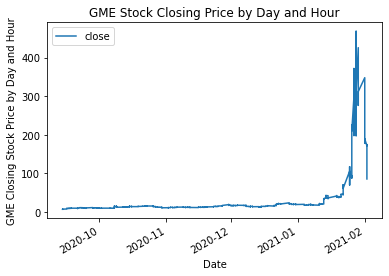

In [8]:
print(f"Line graphs for GME Stock Price Close by Date\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='Date_Object', y="close", kind="line",title=f"GME Stock Closing Price by Day and Hour")

plt.ylabel("GME Closing Stock Price by Day and Hour")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_By_Date_Hour.png'))
plt.show()

Line graphs for Reddit Message Volume by Date




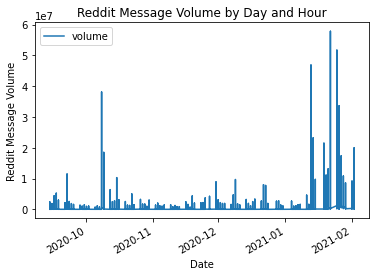

In [9]:
print(f"Line graphs for Reddit Message Volume by Date\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='Date_Object', y="volume", kind="line",title=f"Reddit Message Volume by Day and Hour")

plt.ylabel("Reddit Message Volume")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'Reddit_Msg_Vol_By_Date_Hour.png'))
plt.show()

Scatter Plot GME Stock Price Close by Message Volume




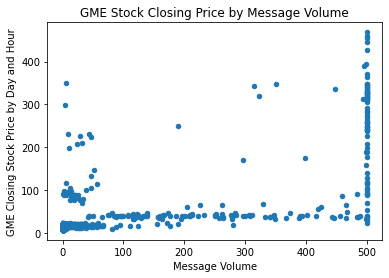

In [10]:
print(f"Scatter Plot GME Stock Price Close by Message Volume\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='# of Comments (Hourly)', y="close", kind="scatter",title=f"GME Stock Closing Price by Message Volume")

plt.ylabel("GME Closing Stock Price by Day and Hour")
plt.xlabel("Message Volume")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_Close_vs_Msg_Vol_per_Hour.png'))
plt.show()